Name: Tan Eng Teck

In [1]:
## Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import confusion_matrix, classification_report

### Ingestion

In [2]:
retail = pd.read_excel("online_retail_II.xlsx")

In [3]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### Exploration

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
#Summary
retail.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [6]:
retail.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [7]:
# Print rows that contain NA values
rows_with_na = retail[retail.isna().any(axis=1)]

print(rows_with_na)

       Invoice StockCode                Description  Quantity  \
263     489464     21733               85123a mixed       -96   
283     489463     71477                      short      -240   
284     489467    85123A                21733 mixed      -192   
470     489521     21646                        NaN       -50   
577     489525    85226C  BLUE PULL BACK RACING CAR         1   
...        ...       ...                        ...       ...   
525231  538159     21324                        NaN       -18   
525232  538158     20892                        NaN       -32   
525233  538160     20956                        NaN       288   
525234  538161    46000S               Dotcom sales      -100   
525235  538162    46000M               Dotcom sales      -100   

               InvoiceDate  Price  Customer ID         Country  
263    2009-12-01 10:52:00   0.00          NaN  United Kingdom  
283    2009-12-01 10:52:00   0.00          NaN  United Kingdom  
284    2009-12-01 10:53:

In [8]:
retail.duplicated().sum()

6865

In [9]:
retail.corr()

/var/folders/gq/nf98s58d705cw4p162k5rth80000gn/T/ipykernel_2543/1234013861.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  retail.corr()


,Quantity,Price,Customer ID
Quantity,1.000000,-0.001931,-0.011577
Price,-0.001931,1.000000,-0.003266
Customer ID,-0.011577,-0.003266,1.000000


#### Observation

Based on exploration above, there are potentially issues in the dataset. First of foremost, it contains NA values at columns ['Description', 'CustomerID']. Secondly, there are duplicated rows inside the dataset. Lastly, in normal retail sense, quantity and price shoud not lower than zero. 

### Transformation

#### Data Cleaning
i. Handle missing values

In [10]:
retail_clean = retail.dropna(axis=0)

In [11]:
retail_clean.describe()

,Quantity,Price,Customer ID
count,417534.000000,417534.000000,417534.000000
mean,12.758815,3.887547,15360.645478
std,101.220424,71.131797,1680.811316
min,-9360.000000,0.000000,12346.000000
25%,2.000000,1.250000,13983.000000
50%,4.000000,1.950000,15311.000000
75%,12.000000,3.750000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [12]:
retail_clean.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

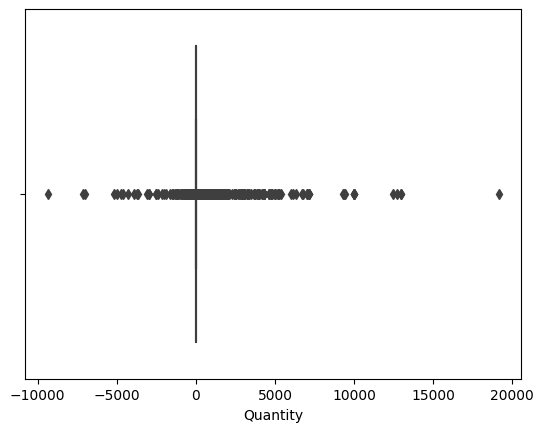

In [13]:
#Boxplot
import seaborn as sns
sns.boxplot(retail_clean['Quantity'])

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

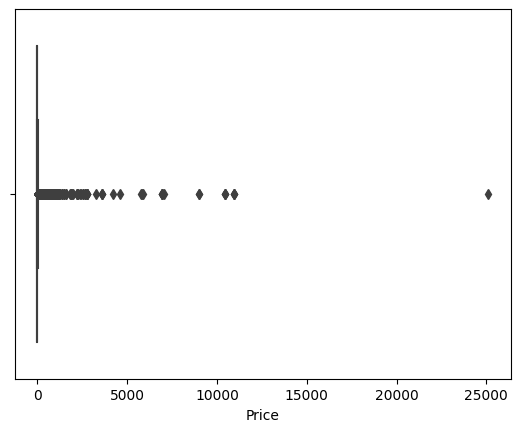

In [14]:
sns.boxplot(retail_clean['Price'])

#### Removing negative values from Quantity & Prices

In [15]:
# Removing negative values from Quantity & Prices
retail_clean = retail_clean.loc[retail_clean['Quantity'] >= 0]
retail_clean = retail_clean.loc[retail_clean['Price'] >= 0]

#### Remove outliers from dataset

In [16]:
import numpy as np

# Price
# Removing outliers using IQR
print("Old shape: ", retail_clean.shape)

# Calculate the upper and lower limits
Q1 = retail_clean['Price'].quantile(0.25)
Q3 = retail_clean['Price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(retail_clean['Price']>=upper)[0]
lower_array = np.where(retail_clean['Price']<=lower)[0]

retail_clean_rm_outlier = retail_clean.reset_index()
 
# Removing the outliers
retail_clean_rm_outlier.drop(index=upper_array, inplace=True)
retail_clean_rm_outlier.drop(index=lower_array, inplace=True)
 
# # Print the new shape of the DataFrame
print("New Shape: ", retail_clean_rm_outlier.shape)

Old shape:  (407695, 8)
New Shape:  (374610, 9)


In [17]:
# Quantity
# Removing outliers using IQR
print("Old shape: ", retail_clean.shape)

retail_clean_rm_outlier = retail_clean_rm_outlier.reset_index()

# Calculate the upper and lower limits
Q1 = retail_clean_rm_outlier['Quantity'].quantile(0.25)
Q3 = retail_clean_rm_outlier['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(retail_clean_rm_outlier['Quantity']>=upper)[0]
lower_array = np.where(retail_clean_rm_outlier['Quantity']<=lower)[0]
 
# Removing the outliers
retail_clean_rm_outlier.drop(index=upper_array, inplace=True)
retail_clean_rm_outlier.drop(index=lower_array, inplace=True)
 
# # Print the new shape of the DataFrame
print("New Shape: ", retail_clean_rm_outlier.shape)

Old shape:  (407695, 8)
New Shape:  (348465, 10)


/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


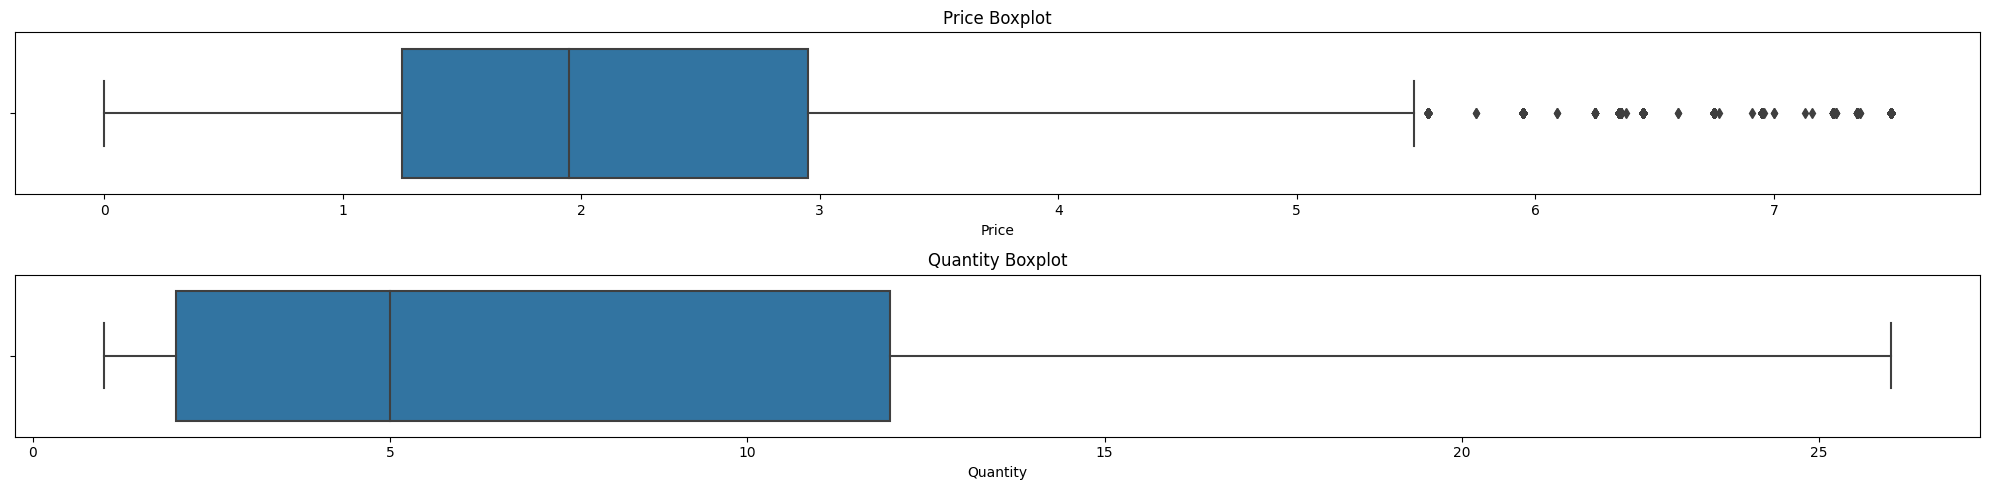

In [18]:
f, ax = plt.subplots(2,1, figsize = (20,5))
sns.boxplot(retail_clean_rm_outlier['Price'], ax=ax[0])
ax[0].set_title('Price Boxplot')

sns.boxplot(retail_clean_rm_outlier['Quantity'], ax=ax[1])
ax[1].set_title('Quantity Boxplot')

plt.tight_layout()
plt.show()

In [19]:
retail_clean = retail_clean_rm_outlier
retail_clean.describe()

,level_0,index,Quantity,Price,Customer ID
count,348465.000000,348465.000000,348465.000000,348465.000000,348465.000000
mean,203811.942585,265528.915243,7.122291,2.354102,15396.981677
std,118142.390090,148670.093774,6.612368,1.659590,1677.643092
min,0.000000,0.000000,1.000000,0.000000,12346.000000
25%,100671.000000,137775.000000,2.000000,1.250000,14031.000000
50%,204100.000000,267870.000000,5.000000,1.950000,15394.000000
75%,306677.000000,393716.000000,12.000000,2.950000,16859.000000
max,407694.000000,525460.000000,26.000000,7.490000,18287.000000


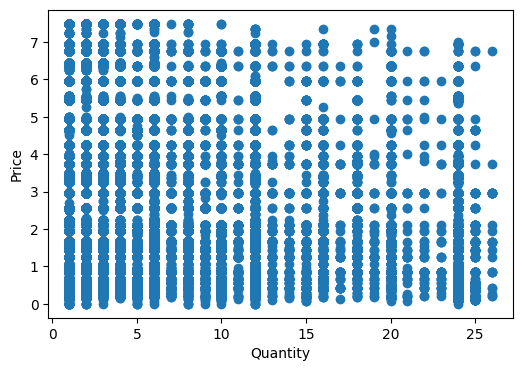

In [20]:
import matplotlib.pyplot as plt

# Scatter plot
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(retail_clean['Quantity'],retail_clean['Price'])
 
# x-axis label
ax.set_xlabel('Quantity')
 
# y-axis label
ax.set_ylabel('Price')
plt.show()

#### Feature Engineering
Extract Invoice date for monthly aggregation.

In [21]:
retail_date = retail_clean

In [22]:
retail_date['MonthYear'] = retail_clean['InvoiceDate'].dt.to_period('M')

In [23]:
print("Min date", retail_date['InvoiceDate'].min())
print("Max date", retail_date['InvoiceDate'].max())

Min date 2009-12-01 07:45:00
Max date 2010-12-09 20:01:00


In [24]:
retail_aggregated = retail_date.groupby('MonthYear')['InvoiceDate'].apply(list).reset_index()

In [25]:
retail_aggregated.head()

,MonthYear,InvoiceDate
0,2009-12,"[2009-12-01 07:45:00, 2009-12-01 07:45:00, 200..."
1,2010-01,"[2010-01-04 09:24:00, 2010-01-04 09:53:00, 201..."
2,2010-02,"[2010-02-01 08:13:00, 2010-02-01 08:13:00, 201..."
3,2010-03,"[2010-03-01 08:38:00, 2010-03-01 08:38:00, 201..."
4,2010-04,"[2010-04-01 07:49:00, 2010-04-01 07:49:00, 201..."


ii. Calculate total sales per transaction

In [26]:
retail_clean['Sales'] = retail_clean['Price']*retail_clean['Quantity']

In [27]:
retail_clean.head()

,level_0,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,MonthYear,Sales
0,0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12,83.4
1,1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,81.0
2,2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,81.0
4,4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12,30.0
5,5,5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,2009-12,39.6


In [28]:
retail_clean['Sales'].describe()

count    348465.000000
mean         12.918194
std          13.434918
min           0.000000
25%           3.900000
50%          10.200000
75%          17.000000
max         175.500000
Name: Sales, dtype: float64

#### Aggregation
i. Group data by Month-Year and Description (product).

In [29]:
retail_descript = retail_date.groupby('MonthYear')['Description'].apply(list).reset_index()

In [30]:
retail_descript

,MonthYear,Description
0,2009-12,"[15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE..."
1,2010-01,"[This is a test product., This is a test produ..."
2,2010-02,"[FANCY FONT HOME SWEET HOME DOORMAT, SPOTTY H..."
3,2010-03,"[FEATHER PEN,COAL BLACK, SET/3 DECOUPAGE STACK..."
4,2010-04,"[DOOR MAT FANCY FONT HOME SWEET HOME, DOOR MAT..."
5,2010-05,"[HEART OF WICKER SMALL, LAVENDER INCENSE IN TI..."
6,2010-06,"[TEA BAG PLATE RED SPOTTY , PAINTED METAL PEAR..."
7,2010-07,"[RED SPOTTY LUGGAGE TAG, RED SPOTTY PEG BAG, S..."
8,2010-08,"[LOVE HEART TRINKET POT, WOODEN BOX OF DOMINOE..."
9,2010-09,"[RED SPOTTY CHARLOTTE BAG, PLASTERS IN TIN WOO..."


ii. Aggregate sales data to get the total sales for each product for each month.

In [31]:
sales_product_by_month = retail_clean.groupby(['StockCode', 'MonthYear']).agg({'Sales': 'sum'}).reset_index()

In [32]:
sales_product_by_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28848 entries, 0 to 28847
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype    
---  ------     --------------  -----    
 0   StockCode  28848 non-null  object   
 1   MonthYear  28848 non-null  period[M]
 2   Sales      28848 non-null  float64  
dtypes: float64(1), object(1), period[M](1)
memory usage: 676.2+ KB


In [33]:
sales_product_by_month.head()

,StockCode,MonthYear,Sales
0,10002,2009-12,99.45
1,10002,2010-01,85.85
2,10002,2010-02,75.65
3,10002,2010-03,111.06
4,10002,2010-04,138.55


In [34]:
sales_des_by_month = retail_clean.groupby(['Description', 'MonthYear']).agg({'Sales': 'sum'}).reset_index()

In [35]:
sales_des_by_month.head()

,Description,MonthYear,Sales
0,DOORMAT UNION JACK GUNS AND ROSES,2010-01,964.50
1,DOORMAT UNION JACK GUNS AND ROSES,2010-02,33.75
2,DOORMAT UNION JACK GUNS AND ROSES,2010-03,86.50
3,3 STRIPEY MICE FELTCRAFT,2009-12,355.05
4,3 STRIPEY MICE FELTCRAFT,2010-01,124.80


In [36]:
sales_des_by_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29300 entries, 0 to 29299
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype    
---  ------       --------------  -----    
 0   Description  29300 non-null  object   
 1   MonthYear    29300 non-null  period[M]
 2   Sales        29300 non-null  float64  
dtypes: float64(1), object(1), period[M](1)
memory usage: 686.8+ KB


#### Optimization

In [37]:
sales_product_by_month['Year'] = sales_product_by_month['MonthYear'].dt.year
sales_product_by_month['Month'] = sales_product_by_month['MonthYear'].dt.month

In [38]:
sales_product_by_month.head()

,StockCode,MonthYear,Sales,Year,Month
0,10002,2009-12,99.45,2009,12
1,10002,2010-01,85.85,2010,1
2,10002,2010-02,75.65,2010,2
3,10002,2010-03,111.06,2010,3
4,10002,2010-04,138.55,2010,4


### Loading
Load the transformed data into a structured storage system. (MySQL, SQLite or AWS S3). In this example, we will the SQLite to store the transformed data into database

In [39]:
sales_product_by_month['MonthYear']

0        2009-12
1        2010-01
2        2010-02
3        2010-03
4        2010-04
          ...   
28843    2009-12
28844    2010-01
28845    2010-02
28846    2010-04
28847    2009-12
Name: MonthYear, Length: 28848, dtype: period[M]

In [40]:
# Convert the 'Period' column to datetime
sales_product_by_month['MonthYear'] = sales_product_by_month['MonthYear'].dt.to_timestamp()

In [91]:
import sqlite3

# Connect to SQLite database (if it doesn't exist, it will be created)
conn = sqlite3.connect('testing.db')

sales_product_by_month.to_sql('sales_product_by_month', conn, if_exists='replace', index=False)

28848

### Validation

In [42]:
retail_descript.head()

,MonthYear,Description
0,2009-12,"[15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE..."
1,2010-01,"[This is a test product., This is a test produ..."
2,2010-02,"[FANCY FONT HOME SWEET HOME DOORMAT, SPOTTY H..."
3,2010-03,"[FEATHER PEN,COAL BLACK, SET/3 DECOUPAGE STACK..."
4,2010-04,"[DOOR MAT FANCY FONT HOME SWEET HOME, DOOR MAT..."


In [43]:
# Convert the 'Period' column to datetime
retail_descript['MonthYear'] = retail_descript['MonthYear'].dt.to_timestamp()
retail_descript['Description'] = retail_descript['Description'].apply(str)

# Load dataset with Month-Year and Description combinations into database
retail_descript.to_sql('retail_descript', conn, if_exists='replace', index=False)

13

In [96]:
# Check for data consistency by comparing aggregate totals with raw data totals

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute a SQL query to retrieve data from the table
cursor.execute('SELECT * FROM sales_product_by_month')

# Fetch the results (if any)
results = cursor.fetchall()

# Assuming data_from_db is a list of tuples
if len(results) == len(sales_product_by_month):
    print("The datasets are identical.")
else:
    print("The datasets are not identical.")

# Close the cursor and connection
cursor.close()

The datasets are identical.


In [100]:
# CHECK FOR DUPLICATES IN MONTH-YEAR AND DESCRIPTION COMBINATIONS

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute a SQL query to retrieve data from the table
# cursor.execute('SELECT MONTHYEAR, DESCRIPTION FROM retail_descript GROUP BY MONTHYEAR, DESCRIPTION LIMIT 10')
cursor.execute('SELECT COUNT(*) FROM retail_descript GROUP BY MONTHYEAR, DESCRIPTION HAVING COUNT(*) > 1')

# Fetch the results (if any)
results = cursor.fetchall()

if len(results) == 0:
    print("No duplicates in dataset")

# Close the cursor and connection
cursor.close()

No duplicates in dataset


In [46]:
# Check if there is null values in stockCode
cursor = conn.cursor()

# Execute a SQL query to retrieve data from the table
cursor.execute('SELECT COUNT(*) FROM sales_product_by_month where StockCode is NULL')

# Fetch the results (if any)
results = cursor.fetchall()

# Print the results
for row in results:
    print(row)

# Close the cursor and connection
cursor.close()

(0,)


In [47]:
# Check if there is null values in stockCode
cursor = conn.cursor()

# Execute a SQL query to retrieve data from the table
cursor.execute('SELECT MonthYear, StockCode, Count(*) FROM sales_product_by_month GROUP BY MonthYear, StockCode')

# Fetch the results (if any)
results = cursor.fetchall()

# Print the results
for row in results:
    print(row)

# Close the cursor and connection
cursor.close()

('2009-12-01 00:00:00', '10002', 1)
('2009-12-01 00:00:00', '10080', 1)
('2009-12-01 00:00:00', '10109', 1)
('2009-12-01 00:00:00', '10120', 1)
('2009-12-01 00:00:00', '10123C', 1)
('2009-12-01 00:00:00', '10125', 1)
('2009-12-01 00:00:00', '10133', 1)
('2009-12-01 00:00:00', '10134', 1)
('2009-12-01 00:00:00', '10135', 1)
('2009-12-01 00:00:00', '10138', 1)
('2009-12-01 00:00:00', '11001', 1)
('2009-12-01 00:00:00', '15030', 1)
('2009-12-01 00:00:00', '15034', 1)
('2009-12-01 00:00:00', '15036', 1)
('2009-12-01 00:00:00', '15039', 1)
('2009-12-01 00:00:00', '15044A', 1)
('2009-12-01 00:00:00', '15044B', 1)
('2009-12-01 00:00:00', '15044C', 1)
('2009-12-01 00:00:00', '15044D', 1)
('2009-12-01 00:00:00', '15056BL', 1)
('2009-12-01 00:00:00', '15056N', 1)
('2009-12-01 00:00:00', '15056P', 1)
('2009-12-01 00:00:00', '15060B', 1)
('2009-12-01 00:00:00', '16011', 1)
('2009-12-01 00:00:00', '16012', 1)
('2009-12-01 00:00:00', '16014', 1)
('2009-12-01 00:00:00', '16015', 1)
('2009-12-01 00:00

In [48]:
# Close connection from sqlite
conn.close()

### Feature Selection & Engineering

Extra feature selection that can be used for data warehouse. 

In [49]:
retail_invoice = retail_date.groupby('Invoice')['StockCode'].apply(list).reset_index()

In [50]:
retail_invoice['Count'] = [len(i) for i in retail_invoice['StockCode']]

In [51]:
sales = retail_clean.groupby(['Invoice']).agg({'Sales': 'sum'}).reset_index()

In [52]:
retail_invoice['Sales'] = sales['Sales']

In [53]:
retail_invoice.head()

,Invoice,StockCode,Count,Sales
0,489434,"[85048, 79323P, 79323W, 21232, 22064, 21871, 2...",7,404.50
1,489435,"[22350, 22349, 22195, 22353]",4,145.80
2,489436,"[48173C, 21755, 21754, 84879, 22119, 22142, 22...",18,613.33
3,489437,"[22143, 22145, 22130, 21364, 21351, 21352, 206...",21,282.90
4,489439,"[22065, 22138, 22139, 22352, 85014A, 85014B, 1...",17,356.40


<b> In retail invoice, we can find that what invoices have the most sales. We can also check the number of purchases on the column 'Count'. Furthermore, we can see that stockcode are grouped by the invoice code. </b>

In [54]:
product_sales = retail_clean.groupby(['StockCode', 'Description']).agg({'Sales': 'sum'}).reset_index()

In [55]:
product_sales.head()

,StockCode,Description,Sales
0,10002,INFLATABLE POLITICAL GLOBE,1827.77
1,10080,GROOVY CACTUS INFLATABLE,10.20
2,10109,BENDY COLOUR PENCILS,1.68
3,10120,DOGGY RUBBER,23.31
4,10125,MINI FUNKY DESIGN TAPES,603.50


In [56]:
print(sales_product_by_month['StockCode'].unique().tolist())

[10002, 10080, 10109, 10120, 10125, 10133, 10134, 10135, 10138, 11001, 15030, 15034, 15036, 15039, 16008, 16010, 16011, 16012, 16014, 16015, 16016, 16033, 16043, 16046, 16047, 16048, 16050, 16052, 16054, 16119, 16212, 16215, 16216, 16218, 16219, 16225, 16235, 16236, 16237, 16238, 16239, 16254, 16259, 17001, 17003, 17021, 17033, 17038, 17039, 17096, 17174, 17178, 17181, 18007, 18010, 20615, 20616, 20617, 20618, 20619, 20620, 20621, 20622, 20652, 20653, 20654, 20655, 20657, 20658, 20659, 20660, 20661, 20662, 20663, 20664, 20665, 20666, 20667, 20668, 20669, 20670, 20671, 20672, 20673, 20674, 20675, 20676, 20677, 20679, 20680, 20681, 20682, 20683, 20684, 20685, 20686, 20688, 20689, 20692, 20693, 20694, 20695, 20696, 20697, 20698, 20699, 20700, 20701, 20702, 20703, 20704, 20705, 20707, 20711, 20712, 20713, 20714, 20716, 20717, 20718, 20719, 20721, 20723, 20724, 20725, 20726, 20727, 20728, 20729, 20730, 20731, 20733, 20734, 20735, 20736, 20738, 20748, 20749, 20750, 20751, 20752, 20753, 20754

In [57]:
sales_product_by_month.sort_values(by=['Sales'])

,StockCode,MonthYear,Sales,Year,Month
14251,22423,2010-06-01,0.00,2010,6
15786,22624,2010-11-01,0.00,2010,11
28845,TEST001,2010-02-01,0.00,2010,2
9063,21843,2010-11-01,0.00,2010,11
16593,22841,2010-12-01,0.00,2010,12
...,...,...,...,...,...
24087,79323W,2009-12-01,4860.00,2009,12
11345,22111,2010-11-01,5098.50,2010,11
11334,22111,2009-12-01,5529.75,2009,12
11358,22112,2010-11-01,5719.80,2010,11


In [58]:
# Removing invalid data

substring = ['ADJUST', 'ADJUST2', 'BANK CHARGES', 'C2', 'D', 'M', 'PADS', 'POST', 'SP1002', 'TEST001', 'TEST002']
filter_test = sales_product_by_month['StockCode'].str.contains('|'.join(substring), na=False)
sales_product_by_month_filtered = sales_product_by_month[~filter_test]
sales_product_by_month_filtered.head(20)

,StockCode,MonthYear,Sales,Year,Month
0,10002,2009-12-01,99.45,2009,12
1,10002,2010-01-01,85.85,2010,1
2,10002,2010-02-01,75.65,2010,2
3,10002,2010-03-01,111.06,2010,3
4,10002,2010-04-01,138.55,2010,4
5,10002,2010-05-01,211.93,2010,5
6,10002,2010-06-01,168.58,2010,6
7,10002,2010-07-01,175.95,2010,7
8,10002,2010-08-01,123.25,2010,8
9,10002,2010-09-01,113.05,2010,9


In [59]:
sales_product_by_month_filtered.describe()

,Sales,Year,Month
count,28020.000000,28020.000000,28020.000000
mean,158.927582,2009.916167,6.994861
std,313.075862,0.277142,3.607571
min,0.000000,2009.000000,1.000000
25%,15.300000,2010.000000,4.000000
50%,51.000000,2010.000000,7.000000
75%,162.500000,2010.000000,10.000000
max,6050.450000,2010.000000,12.000000


In [60]:
sales_product_by_month_filtered.corr()

/var/folders/gq/nf98s58d705cw4p162k5rth80000gn/T/ipykernel_2543/878717311.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sales_product_by_month_filtered.corr()


,Sales,Year,Month
Sales,1.000000,0.004916,0.052433
Year,0.004916,1.000000,-0.419690
Month,0.052433,-0.419690,1.000000


/var/folders/gq/nf98s58d705cw4p162k5rth80000gn/T/ipykernel_2543/3602811233.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(sales_product_by_month_filtered.corr(), cmap="YlGnBu", annot=True)


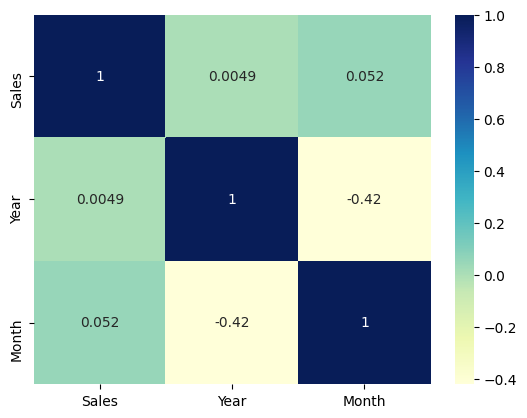

In [61]:
import matplotlib.pyplot as mp
import seaborn as sb

# plotting correlation heatmap
dataplot = sb.heatmap(sales_product_by_month_filtered.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

In [62]:
month_year_sales = sales_product_by_month_filtered.groupby(['MonthYear']).agg({'Sales': 'sum'}).reset_index()
month_year_sales.head()

,MonthYear,Sales
0,2009-12-01,361369.81
1,2010-01-01,251483.89
2,2010-02-01,261050.28
3,2010-03-01,354148.01
4,2010-04-01,307361.77


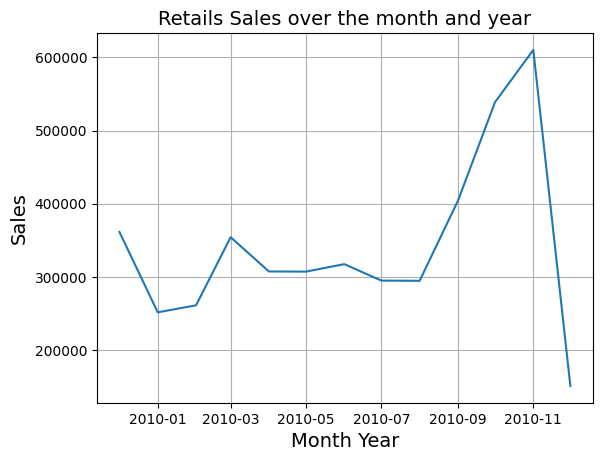

In [63]:
plt.plot(month_year_sales['MonthYear'], month_year_sales['Sales'])
plt.title('Retails Sales over the month and year', fontsize=14)
plt.xlabel('Month Year', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.grid(True)
plt.show()

In [64]:
# product_sales = retail_clean.groupby(['StockCode', 'Description']).agg({'Sales': 'sum'}).reset_index()

df = sales_product_by_month_filtered.groupby(['Month', 'Year']).agg({'Sales': 'sum'}).reset_index()

In [65]:
df.head()

,Month,Year,Sales
0,1,2010,251483.89
1,2,2010,261050.28
2,3,2010,354148.01
3,4,2010,307361.77
4,5,2010,307124.99


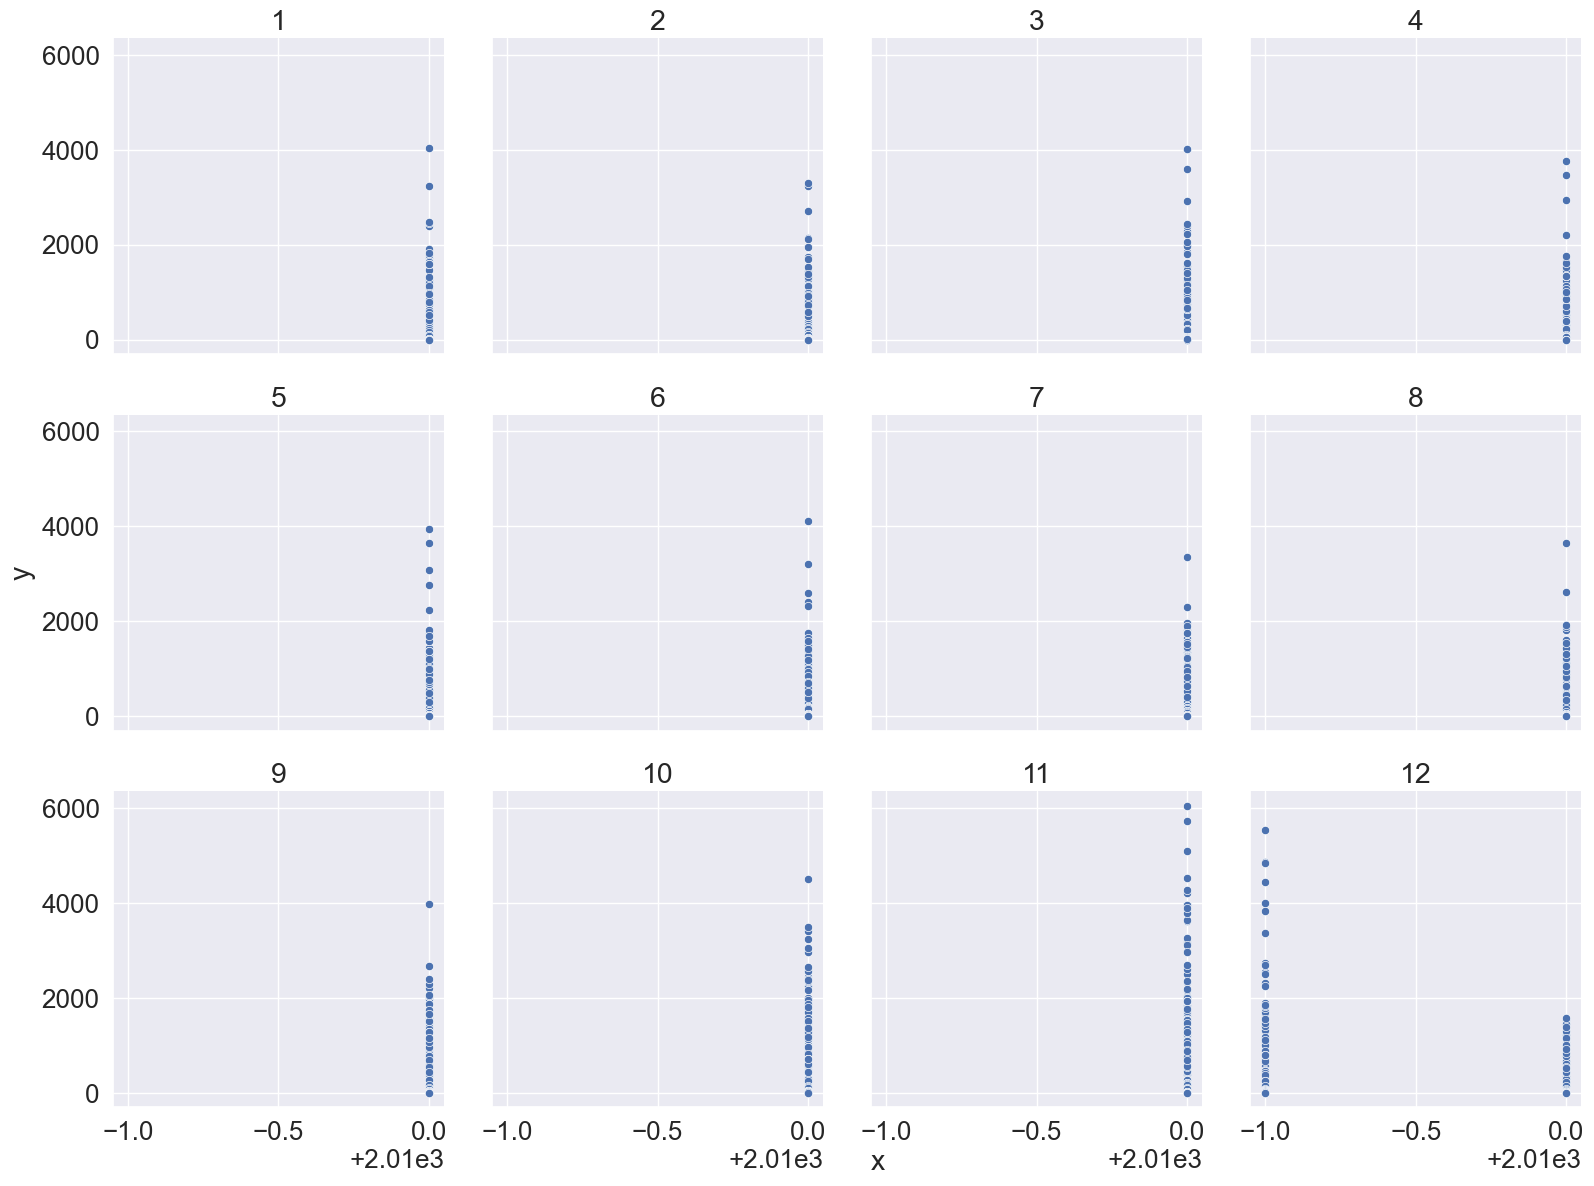

In [66]:
import seaborn as sns

df = sales_product_by_month_filtered

sns.set(font_scale=1.7)
g = sns.relplot(kind='scatter', data=df, x='Year', y='Sales', col='Month', col_wrap=4, height=4, aspect=1)

# optionally remove the `month=` in the title
for name, ax in g.axes_dict.items():
    ax.set_title(name)
plt.setp(g.axes, xlabel='', ylabel='')  # remove all x and y labels
g.axes[-2].set_xlabel('x', loc='left')  # set an x label at the left of the second to last subplot
g.axes[4].set_ylabel('y')  # set a y label to 5th subplot

plt.subplots_adjust(left=0.06, bottom=0.06)  # set some more spacing at the left and bottom
plt.show()

### Training and Test
There are many ways of splitting the dataset. For instance, dataset can be splitted into 3 types such as training set, validation set & testing data. In this example, we use the most common apporach such as splitting it into 80% of training data and 20% of testing data. 

We will use 0.8 porpotion of dataset for training purpose and 0.2 porpotion of dataset for testing purpose.

In [67]:
# Encoding categorical variables (Product and Month)
df_encoded = pd.get_dummies(sales_product_by_month_filtered, columns=['StockCode'], drop_first=True)

In [68]:
df_encoded.describe() 

,Sales,Year,Month,StockCode_10080,StockCode_10109,StockCode_10120,StockCode_10125,StockCode_10133,StockCode_10134,StockCode_10135,...,StockCode_90214O,StockCode_90214P,StockCode_90214R,StockCode_90214S,StockCode_90214T,StockCode_90214U,StockCode_90214V,StockCode_90214W,StockCode_90214Y,StockCode_90214Z
count,28020.000000,28020.000000,28020.000000,28020.000000,28020.000000,28020.000000,28020.000000,28020.000000,28020.000000,28020.000000,...,28020.000000,28020.000000,28020.000000,28020.000000,28020.000000,28020.000000,28020.000000,28020.000000,28020.000000,28020.000000
mean,158.927582,2009.916167,6.994861,0.000143,0.000036,0.000286,0.000393,0.000464,0.000428,0.000464,...,0.000178,0.000178,0.000286,0.000321,0.000178,0.000036,0.000250,0.000071,0.000036,0.000143
std,313.075862,0.277142,3.607571,0.011947,0.005974,0.016895,0.019810,0.021535,0.020691,0.021535,...,0.013357,0.013357,0.016895,0.017919,0.013357,0.005974,0.015804,0.008448,0.005974,0.011947
min,0.000000,2009.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.300000,2010.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,2010.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,162.500000,2010.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6050.450000,2010.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
from sklearn.preprocessing import MinMaxScaler

columns = ['Sales']
norm = MinMaxScaler()
sales_product_by_month_filtered['columns'] = norm.fit_transform(df_encoded[columns])

/var/folders/gq/nf98s58d705cw4p162k5rth80000gn/T/ipykernel_2543/1560359513.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_product_by_month_filtered['columns'] = norm.fit_transform(df_encoded[columns])


In [70]:
X = df_encoded.drop('Sales', axis = 1)
X = df_encoded.drop('MonthYear', axis = 1)
Y = df_encoded['Sales']

# X, Y shape
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (28020, 3505)
Y shape:  (28020,)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [72]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (22416, 3505)
Number transactions y_train dataset:  (22416,)
Number transactions X_test dataset:  (5604, 3505)
Number transactions y_test dataset:  (5604,)


### Scaling & Normalisation

In our dataset, it appears that dataset does not have sufficient information on certain stockcode. For instance, stockcode only appears in a timeframe. Thus, it will cost bias in dataset and lead to overfitting model. Hence, it is crucial to oversample some rows from the dataset for the fairness.

In [73]:
sales_product_by_month_filtered['StockCode'] = sales_product_by_month_filtered['StockCode'].astype(str)

/var/folders/gq/nf98s58d705cw4p162k5rth80000gn/T/ipykernel_2543/3626334331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_product_by_month_filtered['StockCode'] = sales_product_by_month_filtered['StockCode'].astype(str)


<b>RandomOverSampler</b> is one of oversampling approaches that object to over-sample the minority class(es) by picking samples at random with replacement. The bootstrap can be generated in a smoothed manner. 

There are also several strategies available to solve the bias issue.
- Oversampling
- UnderSampling
- SMOTE (Synthetic Minority Over-sampling Technique)

In [74]:
# https://www.kdnuggets.com/2023/01/7-smote-variations-oversampling.html
    
# Imbalanced data
from imblearn.over_sampling import RandomOverSampler

X = sales_product_by_month_filtered[['Sales', 'Month', 'Year']]
y = sales_product_by_month_filtered['StockCode']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [75]:
sales_product_by_month_resampled = X_resampled
sales_product_by_month_resampled['StockCode'] = y_resampled
sales_product_by_month_resampled.head()

,Sales,Month,Year,StockCode
0,99.45,12,2009,10002
1,85.85,1,2010,10002
2,75.65,2,2010,10002
3,111.06,3,2010,10002
4,138.55,4,2010,10002


In [76]:
df_encoded_resampled = pd.get_dummies(sales_product_by_month_resampled, columns=['StockCode'], drop_first=True)

In [77]:
X_resampled = df_encoded_resampled.drop('Sales', axis = 1)
Y_resampled = df_encoded_resampled['Sales']

# X, Y shape
print("X shape: ", X_resampled.shape)
print("Y shape: ", y_resampled.shape)

X shape:  (45539, 3504)
Y shape:  (45539,)


In [78]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, Y_resampled, test_size = 0.2, random_state = 42)

# describes info about train and test set
print("Number transactions X_train_resampled dataset: ", X_train_resampled.shape)
print("Number transactions y_train_resampled dataset: ", y_train_resampled.shape)
print("Number transactions X_test_resampled dataset: ", X_test_resampled.shape)
print("Number transactions y_test_resampled dataset: ", y_test_resampled.shape)


Number transactions X_train_resampled dataset:  (36431, 3504)
Number transactions y_train_resampled dataset:  (36431,)
Number transactions X_test_resampled dataset:  (9108, 3504)
Number transactions y_test_resampled dataset:  (9108,)


### Storage

In [79]:
# Export train_data to CSV
X_train_resampled.to_csv('X_train.csv', index=False)
y_train_resampled.to_csv('y_train.csv', index=False)

# Export test_data to CSV
X_test_resampled.to_csv('X_test.csv', index=False)
y_test_resampled.to_csv('y_test.csv', index=False)

### Validation & Integrity Checks

In [80]:
# Assuming X_train and X_test are your training and testing data respectively
# You can replace these with your actual training and testing data

# Convert the data to sets for easy comparison
train_set = set(X_train.index)
test_set = set(X_test.index)

# Check for overlapping data points
overlapping_points = train_set.intersection(test_set)

# Print the overlapping data points (if any)
print("Number of overlapping data points:", len(overlapping_points))

if len(overlapping_points) > 0:
    print("Overlapping indices:", overlapping_points)
else:
    print("No overlapping data points found.")

Number of overlapping data points: 0
No overlapping data points found.


In [81]:
print(X_train.isna().sum())
print(y_train.isna().sum())

Sales               0
Year                0
Month               0
StockCode_10080     0
StockCode_10109     0
                   ..
StockCode_90214U    0
StockCode_90214V    0
StockCode_90214W    0
StockCode_90214Y    0
StockCode_90214Z    0
Length: 3505, dtype: int64
0


### Model Selection (Bonus)

<b>In our goal, we would like to transform these raw transactions into data that is suitable for predicting the monthly sales of a particular product.</b> Hence, linear regression comes in handy that it reliers the numerical variables and make the prediction accordingly. In our model selection, we use simple linear regression and XGBoost in linear formula to predic the sales based on the stockcode, month and years.

Besides that, there are other approaches comes in handy to solve the business problem. For instance, we can use k-means clusterin to find the customer segmentation. We can use RandomForestClassifier to find the group of customers.

#### Machine Learning: Linear Regression

https://python.plainenglish.io/how-to-create-a-machine-learning-model-in-python-for-sales-prediction-23e19098069

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate the performance of the model on the test set
lr_preds = lr.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)

# Print the evaluation metrics for the model
print('Linear Regression - MAE:', lr_mae, 'MSE:', lr_mse, 'R-squared:', lr_r2)

Linear Regression - MAE: 1.6389996713997052e-07 MSE: 1.505412250859278e-10 R-squared: 0.9999999999999984


In [83]:
lr_preds

array([138.6 ,   8.85, 158.75, ...,  29.7 ,  45.  ,   3.36])

In [84]:
lr = LinearRegression()
lr.fit(X_train_resampled, y_train_resampled)

# Evaluate the performance of the model on the test set
lr_preds = lr.predict(X_test_resampled)
lr_mae = mean_absolute_error(y_test_resampled, lr_preds)
lr_mse = mean_squared_error(y_test_resampled, lr_preds)
lr_r2 = r2_score(y_test_resampled, lr_preds)

# Print the evaluation metrics for the model
print('Linear Regression - MAE:', lr_mae, 'MSE:', lr_mse, 'R-squared:', lr_r2)

Linear Regression - MAE: 68.33043110091486 MSE: 29842.21344209892 R-squared: 0.6486108953808295


/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

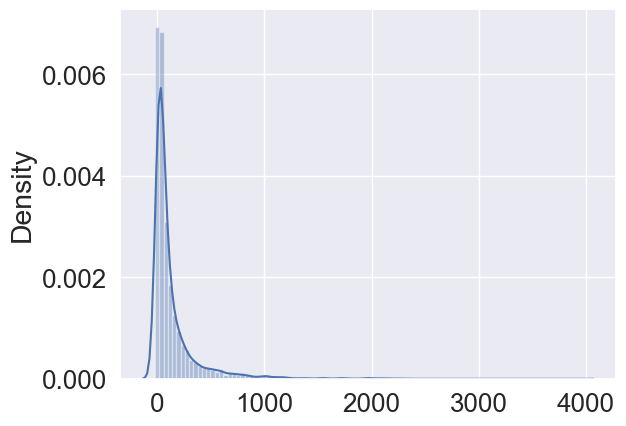

In [85]:
sns.distplot(lr_preds,bins=100)

In [86]:
y_test_resampled.shape
# lr_preds.shape

(9108,)

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

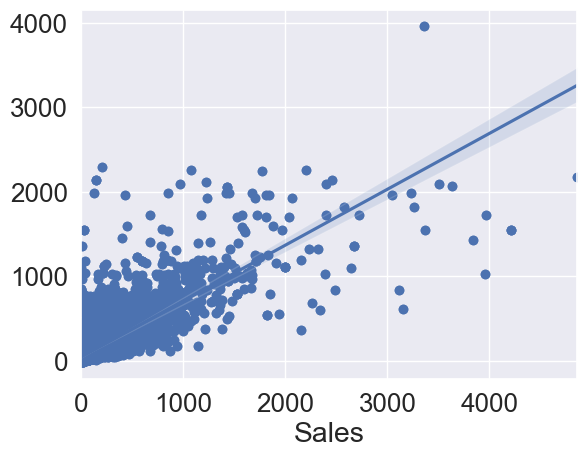

In [87]:
plt.scatter(y_test_resampled,lr_preds)
sns.regplot(y_test_resampled,lr_preds)

#### Maching Learning XGBoost

XGBoost is one of the ensemble learning methods. Researches find that this machine learning tends to produce high accuracy of results. 

In [88]:
import xgboost as xgb

matrix_train = xgb.DMatrix(X_train, label = y_train)
matrix_test = xgb.DMatrix(X_test, label = y_test)

# Run XGB 
model = xgb.train(params={'objective':'reg:linear','eval_metric':'mae'}
                ,dtrain = matrix_train, num_boost_round = 500, 
                early_stopping_rounds = 20, evals = [(matrix_test,'test')],)

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [14:26:41] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[0]	test-mae:119.63892
[1]	test-mae:83.80771
[2]	test-mae:58.73192
[3]	test-mae:41.32183
[4]	test-mae:29.41805
[5]	test-mae:21.15274
[6]	test-mae:15.37837
[7]	test-mae:11.47810
[8]	test-mae:8.85137
[9]	test-mae:7.02855
[10]	test-mae:5.89219
[11]	test-mae:5.23462
[12]	test-mae:4.84312
[13]	test-mae:4.86874
[14]	test-mae:4.90627
[15]	test-mae:4.64729
[16]	test-mae:4.69129
[17]	test-mae:4.64915
[18]	test-mae:4.63505
[19]	test-mae:4.65471
[20]	test-mae:4.60280
[21]	test-mae:4.59538
[22]	test-mae:4.61251
[23]	test-mae:4.55203
[24]	test-mae:4.59276
[25]	test-mae:4.61232
[26]	test-mae:4.63111
[27]	test-mae:4.64948
[28]	test-mae:4.66641
[29]	test-mae:4.66473
[30]	test-mae:4.69614
[31]	test-mae:4.70799
[32]	test-mae:4.69740
[33]	test-mae:4.72153
[34]	test-mae:4.73291
[35]	test-mae:4.74031
[36]	test-mae:4.76151
[37]	test-mae:4.77651
[38]	test-mae:4.78251
[39]	test-mae:4.73459
[40]	test-mae:4.75109
[41]	test-mae:4.74247
[42]	test-mae:4.77842
[43]	test-mae:4.79885


In [89]:
# Making predictions
predictions = model.predict(matrix_test)

# Computing RMSE
print("RMSE: %f" % (np.sqrt(mean_squared_error(y_test, predictions))))

RMSE: 48.525464


#### Possible Models:

1. K-Means Clustering (Customer Segmentation)
2. P-tree Algorithm
